<a href="https://www.kaggle.com/code/ramsesmdlc/titanic-linear-regression-model?scriptVersionId=130254598" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#Type of machine learning system to build:
    #1. Supervised Learning.
    #2. Batch Learning (also called "offline learning").
    #3. Model-based learning.

#Python Libraries

import numpy as np # linear algebra
import pandas as pd # data processing

import matplotlib.pyplot as plt # data visualization
from pandas.plotting import scatter_matrix # data visualization

from sklearn.model_selection import train_test_split # Machine Learning - split dataset (train/test)
from sklearn.preprocessing import OrdinalEncoder # Machine Learning (clean data) - Encoder Categorical Attributes
from sklearn.preprocessing import OneHotEncoder # Machine Learning (clean data)- OneHot Encoder Categorical Attributes
from sklearn.preprocessing import MinMaxScaler #Machine Learning (scaling data) - Normalization
from sklearn.preprocessing import StandardScaler #Machine Learning (scaling data) - Z-Score Normalization
from sklearn.linear_model import LinearRegression #Machine Learning - Linear Regression Model
from sklearn.metrics import mean_squared_error #Machine Learning - Mean Square Error (MSE)
from sklearn.model_selection import cross_val_score #Machine Learning - Evaluation by Cross Validation

# __1. Loading the Data__

Showing only the first ten rows of the Data (the first row is the head, and the following rows are data points).

In [2]:
training_data = pd.read_csv("/kaggle/input/titanic/train.csv")
training_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# __2. Exploring the Data__

## __2.1. Looking at the Data Structure__

### __2.1.1. Getting information/description of data__:
1. Number of rows and columns
2. Number and names of features' type (float64, int64, object)
3. Number of non-null values
4. Name of features

In [3]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### __2.1.2. Data Dictionary__:

1. survival - Survival (0 = No, 1 = Yes)
2. pclass - Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
3. sex - Sex 
4. Age - Age in years
5. sibsp - number of siblings / spouses aboard the Titanic.
        5.1. Sibling = brother, sister, stepbrother, stepsister.
        5.2. Spouse = husband, wife (mistresses and fiancés were ignored).
6. parch - number of parents / children aboard the Titanic. The dataset defines family relations in this way:
        6.1. Parent = mother, father
        6.2. Child = daughter, son, stepdaughter, stepson
        6.3. Some children travelled only with a nanny, therefore parch=0 for them.
7. ticket - Ticket number
8. fare - Passenger fare
9. cabin - Cabin number
10. embarked - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### __2.1.3. Categories that exist in a feature__:

After checking the first rows of data, we know the following about the features "Sex" and "Embarked":
1. They are categorical attributes (object)
2. They have repetitive values
3. They have several categories

After checking the first rows of data, we know the following about the features "Pclass", "SibSp", and "Parch":
1. They are categorical attributes (int64)
2. They have repetitive values
3. They have several categories

In [4]:
#Categories in a feature.
training_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [5]:
#Categories in a feature.
training_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
#Categories in a feature.
training_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [7]:
#Categories in a feature.
training_data["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [8]:
#Categories in a feature.
training_data["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

### __2.1.4. Summary of numerical attributes__:

In essence, it is descriptive statistics (count, mean, standard deviation, minimum value, maximum value, and 25% - 50% - 75% percentile).

<div class="alert alert-block alert-warning"><b>Important:</b> After providing a brief overview of values such as the "mean, min, and max", we can conclude that it will be necessary to apply "feature scaling" soon in some numeric attributes. 

For instance, we can see that the mean values of features such as "Fare" and "Age" are much larger than the mean value of the feature "Pclass" .</div>

In [9]:
training_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### __2.1.5. Summary of numerical attributes (in a graph way)__:

Histograms and BoxPlots applied for each numerical attribute.

The data have not been scaled or capped yet. 

> There are no preprocessed attributes.

<div class="alert alert-block alert-warning"><b>Important:</b> Be cautious of histograms that are tail-heavy, such as those belonging to the features "Fare" and "Age". Consider using feature scaling techniques to transform them into more bell-shaped distributions. </div>

<function matplotlib.pyplot.show(close=None, block=None)>

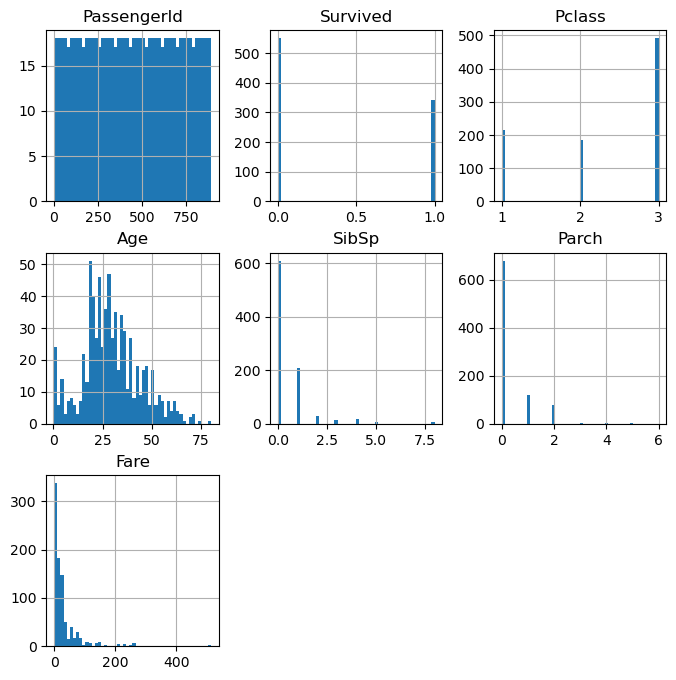

In [10]:
#Histogram

    #The argument "Figsize" is used for adjusting the size values of a graph (x,y).

training_data.hist(bins= 50, figsize = (8,8))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

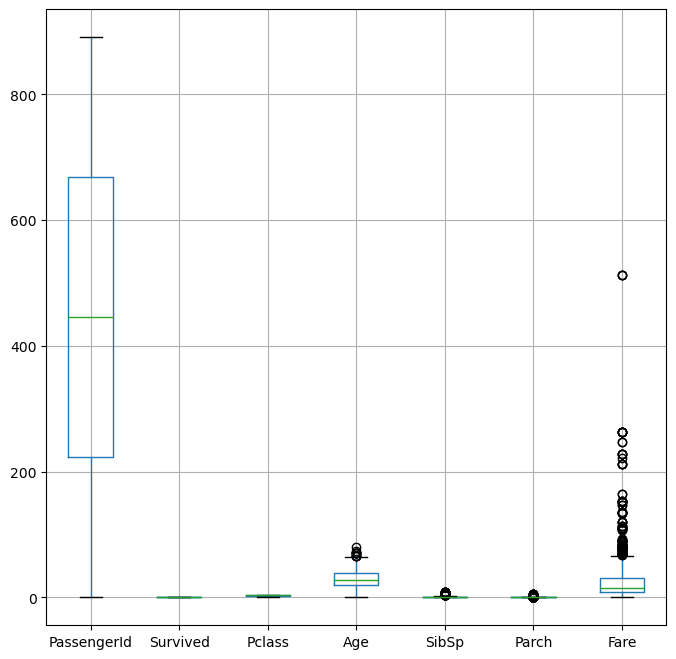

In [11]:
#BoxPlot

    #The argument "Figsize" is used for adjusting the size values of a graph (x,y).

boxplot = training_data.boxplot(column=["PassengerId",'Survived','Pclass',"Age", "SibSp", "Parch", "Fare"],figsize = (8,8)) 
plt.show

# __3. Creating a Test Set__

Although this competition has a separate Test Set, I have decided to set aside from the "Training Set" another "Test Set". It is theoretically simple picking 20% of the dataset.

There are a couple of ways to create a Test Set. They are the followings:
1. __Option 1__: shuffling indices and then splitting data randomly.

> <span style="color:black">__Caution:__</span> This option (purely random sampling) is appropriate if the dataset is large enough relative to the number of attributes.

> No established "random number generator seed" to generate the same shuffled indices for the Test Set could be a problem. With this function, the generation of different Test Sets every time we run is avoided.

> It could be problematic if the dataset is updated. Maintaining stable the "training and test data" after the dataset is updated is achievable if we establish identifiers for the data points that will be part of the training and test set. <-- <span style="color:black">__It is NOT DONE in this Notebook.__</span> 
        

2. __Option 2__: Using the Scikit Learn function to split data randomly.

> <span style="color:black">__Caution:__</span> This option (purely random sampling) is appropriate if the dataset is large enough relative to the number of attributes.

> This function allows splitting the data into training data and a test set. In addition, it has the parameter to set the "random number generator seed" called "random_state"

3. __Option 3__: Using the "Scikit Learn" function to split the data in a stratified way. <-- <span style="color:black">__This option is NOT DONE in this Notebook.__</span> 

> <span style="color:black">__Caution:__</span> This option (stratified sampling) is appropriate if the dataset is not large enough relative to the number of attributes; therefore, it is avoided the risk of sampling bias.

> The purpose of this is to split the entire dataset into homogeneous groups. Then from those groups, we sample the right amount of items that represent each of them fairly. Finally, those samples are going to be part of the Test Set (i.e., the Test Set is going to have representative data from each group of the entire dataset).

> <span style="color:black">__Caution:__</span> Do not forget to deal with or preprocess NA values before applying this procedure.

## __3.1. Option 1: Shuffling indices and then splitting data randomly__

In [12]:
#"random number generator seed"
np.random.seed(66)

#Function to split the dataset 
    #The role of indices in this function is relevant. 
    #np.random.permutation(x): Randomly permute a sequence, or return a permuted range. 
        #If x is a multi-dimensional array, it is only shuffled along its first index.
        #If x is an array, make a copy and shuffle the elements randomly.
    #iloc: integer-location based indexing for selection by position.
        #Indexing just the rows that belong to the "training set" and "test set"
    
def split_dataset(dataset, test_ratio):
    shuffled_indices_dataset = np.random.permutation(len(dataset))
    size_of_test_set = int(len(dataset)*test_ratio)
    indices_of_test_set = shuffled_indices_dataset[:size_of_test_set]
    indices_of_train_set = shuffled_indices_dataset[size_of_test_set:]
    return dataset.iloc[indices_of_train_set], dataset.iloc[indices_of_test_set]

In [13]:
#Executing the function to split the dataset
    #Assumption: 20% of data will be for the test set (ratio =0.2)
    #The newly created and returned index will help build the training set and test set.
    
train_set2, test_set2 = split_dataset(training_data, 0.2)

#Printing the "len" of the new training set (version 2)
len(train_set2)

713

In [14]:
#Printing the "len" of the new test set (version 2)
len(test_set2)

178

In [15]:
#Printing a couple of rows of the new training set (version 2)
train_set2.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
751,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S
655,656,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.5000,NaN,S
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
114,115,0,3,"Attalah, Miss. Malake",female,17.0,0,0,2627,14.4583,NaN,C


In [16]:
#Printing a couple of rows of the new test set (version 2)
test_set2.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
652,653,0,3,"Kalvik, Mr. Johannes Halvorsen",male,21.0,0,0,8475,8.4333,NaN,S
141,142,1,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,347081,7.7500,NaN,S
669,670,1,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",female,NaN,1,0,19996,52.0000,C126,S
200,201,0,3,"Vande Walle, Mr. Nestor Cyriel",male,28.0,0,0,345770,9.5000,NaN,S


## __3.2. Option 2: Using the Scikit Learn function to split data randomly__

In [17]:
#Executing the function to split the dataset
    #Assumption: 20% of data will be for the test set (ratio =0.2)
    #In this function, shuffle by default is True.
    #Save plenty of time!

train_set3, test_set3 = train_test_split(training_data, test_size = 0.2, random_state = 66)

#Printing the "len" of the new training set (version 3)
len(train_set3)

712

In [18]:
#Printing the "len" of the new test set (version 3)
len(test_set3)

179

In [19]:
#Printing a couple of rows of the new training set (version 3)
train_set3.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
655,656,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.5000,NaN,S
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
114,115,0,3,"Attalah, Miss. Malake",female,17.0,0,0,2627,14.4583,NaN,C
854,855,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.0000,NaN,S


In [20]:
#Printing a couple of rows of the new test set (version 3)
test_set3.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
652,653,0,3,"Kalvik, Mr. Johannes Halvorsen",male,21.0,0,0,8475,8.4333,NaN,S
141,142,1,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,347081,7.7500,NaN,S
669,670,1,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",female,NaN,1,0,19996,52.0000,C126,S
200,201,0,3,"Vande Walle, Mr. Nestor Cyriel",male,28.0,0,0,345770,9.5000,NaN,S


# __4. Visualize the Data__

This process is helpful to gain insights about the training data.
> While large training datasets have to be sampled for the visualization stage, small training datasets like ours (891rows of data) can be entirely explored.

<AxesSubplot:xlabel='Fare', ylabel='Pclass'>

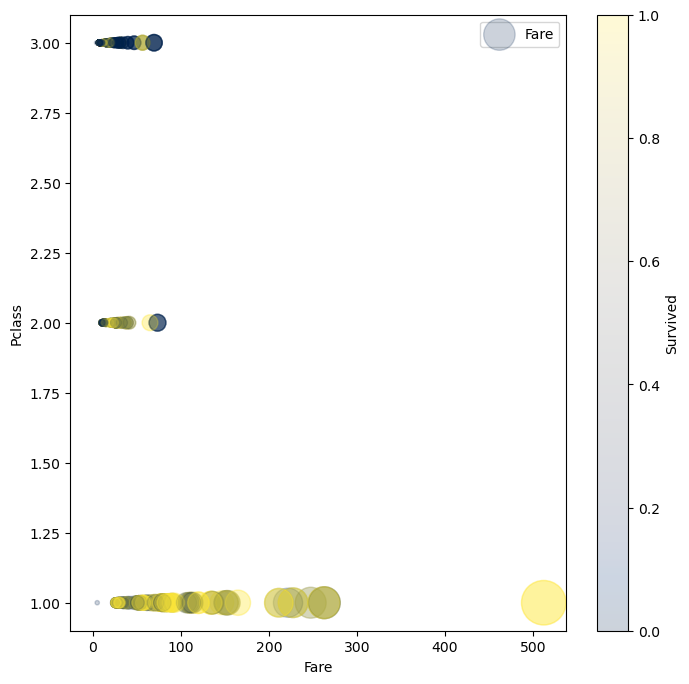

In [21]:
#In this scenario, the original "training set" given by this Kaggle problem is used

#Dataframe.plot

#Some relevant arguments of "Dataframe.plot" function are the followings:
    #s: The marker size (radius of each circle of the scatterplot. In this case, the bigger the circle, the bigger the Fare.
    #c: The marker colors (represents if the passenger survived or not)
    #alpha: The alpha blending value, between 0 (transparent) and 1 (opaque). This argument allows us to see the intersection between data points of the scatterplot.
    #colorbar: This bar works like a guide for the user. It is a very helpful complement to the "c" and "cmap" arguments.
    #cmap: The colormap. There are several ways to deal with this argument.
        #Option 1:
            #Using the function "mpl.colors.ListedColormap([,])"
            #The function "mpl.colors.ListedColormap([,])" needs to load the following:
                #Library: matplotlib
                #Alias: mpl
        #Option 2: Preferred!
            #Using the function "matplotlib.pyplot.get_cmap(name=None, lut=None)"
            #The function "get_cmap" uses information previously loaded, such as:
                #Library: matplotlib
                #Module: pyplot
                #Alias: plt
        #To know more about the function "get_cmap", see the following markdown
training_data.plot(kind= "scatter", x="Fare", y="Pclass", s=2*training_data["Fare"], figsize = (8,8), c="Survived", cmap= plt.get_cmap("cividis"), label = "Fare", colorbar=True ,alpha= 0.2)

> Detailed information about how the function "get_cmap" works (arguments, etc.)

<a href="https://matplotlib.org/stable/api/cm_api.html#module-matplotlib.cm">Matplotlib link about Return a color map specified through cmap.</a>


> Detailed information about the argument "colormap" chosen: Sequential (to be specific: "cividis")

<a href="https://matplotlib.org/stable/gallery/color/colormap_reference.html">Matplotlib link about Colormap Reference</a>

<a href="https://matplotlib.org/stable/tutorials/colors/colormaps.html">Matplotlib link about Choosing Colormaps in Matplotlib</a>

## __4.1. Looking for correlations (in numerical attributes)__

### __4.1.1. Correlation(Standard Correlation Coefficient)__

This process is helpful to gain insights about the training data.

1. __"Compute the Standard Correlation Coefficient" (i.e., Pearson's Correlation Coefficient {r})__ between the numerical attributes of our dataset. When using the Standard Correlation Coefficient, it is important to be aware of the following points:

> It only measures "linear correlation".

> It ranges from -1 to 1.

> The values of r=1 and r=-1 show a strong linear correlation between the variables.

> A negative linear correlation, indicated by a correlation coefficient ranging from 0 to -1, means that as one attribute increases, the other attribute tends to decrease.

> A positive linear correlation, indicated by a correlation coefficient ranging from 0 to 1, means that as one attribute increases, the other attribute tends to increase as well."

> The value of r=0 shows a no linear correlation between the variables.

2. __Options to "Compute the Standard Correlation Coefficient"__:

> __Option 1__: Compute the "Standard Correlation Coefficient" of all numerical attributes of our dataset between each other.

> __Option 2 (more efficient way)__: "Compute the Standard Correlation Coefficient" of all numerical attributes of our dataset against an interesting attribute (i.e. the "target value" that we want to predict using the Test Set).

In [22]:
#Applying Option 1 (Compute the "Standard Correlation Coefficient" of all numerical attributes of our dataset between each other)

    #Interesting outputs (correlations): "Survived vs Pclass", "Survived vs Fare","Pclass vs Fare","Pclass vs Age", "Age vs SipSp", "SibSp vs Parch", "Parch vs Age", and Parch vs Fare".
correlation_matrix = training_data.corr()

correlation_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [23]:
#Applying Option 2 ("Compute the Standard Correlation Coefficient" of specific numerical attributes of our dataset against an interesting attribute)

    #Interesting outputs (correlations): "Survived vs Pclass" and "Survived vs Fare"

correlation_matrix["Survived"].sort_values(ascending = False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

### __4.1.2. Correlation (using graphs)__

This process is helpful to gain insights about the training data.

1. "__Graphical Correlation between the numerical attributes__" of our dataset.  When it is used, could be wortwhile to be aware of the followings points:

> If you have a large number of numerical attributes, select only the most promising ones for this process, using as a guide the outputs of section "__4.1.1. (Correlation - Standard Correlation Coefficient)__". Otherwise we are going to get a graphical mess (do not forget that "the number of plots" = "number of attributes squared").

> If we are dealing with attributes that have tail-heavy distribution {according to the section "__2.1.5. Summary of numerical attributes (in a graph way)__"}, transform those attributes before the "Graphical Correlation Procedure" could be helpful.

> Quirky data points can be spotted during the process of "Graphical Correlation". Clean quirky data points after the process of "Graphical Correlation" might be helpful for the performance of the model during the test phase.

array([[<AxesSubplot:xlabel='PassengerId', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Survived', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Pclass', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Age', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='SibSp', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Parch', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Fare', ylabel='PassengerId'>],
       [<AxesSubplot:xlabel='PassengerId', ylabel='Survived'>,
        <AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Survived'>,
        <AxesSubplot:xlabel='Parch', ylabel='Survived'>,
        <AxesSubplot:xlabel='Fare', ylabel='Survived'>],
       [<AxesSubplot:xlabel='PassengerId', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Survived', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Pclass', ylabel='

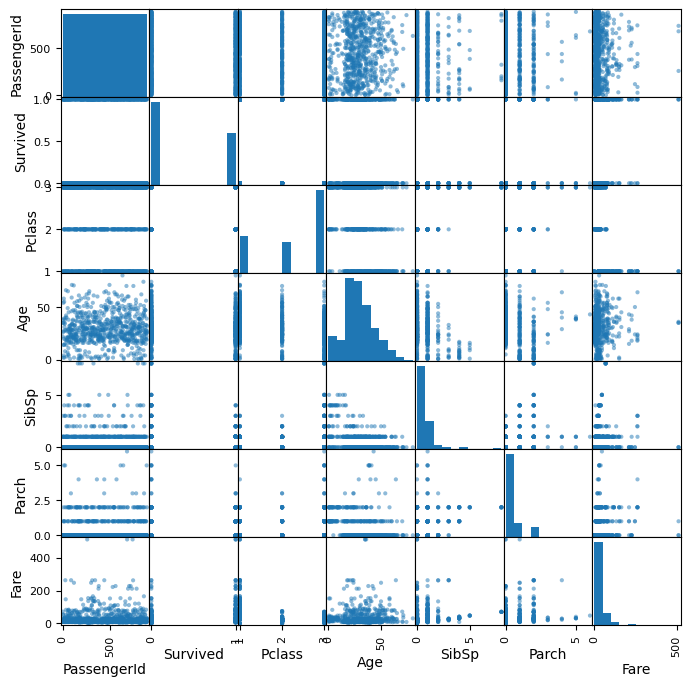

In [24]:
#Graphical Correlation between all the numerical attributes of our trainig set
scatter_matrix(training_data, figsize=(8,8))

array([[<AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot:xlabel='Fare', ylabel='Survived'>,
        <AxesSubplot:xlabel='Age', ylabel='Survived'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Fare', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Age', ylabel='Pclass'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Fare'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Fare'>,
        <AxesSubplot:xlabel='Fare', ylabel='Fare'>,
        <AxesSubplot:xlabel='Age', ylabel='Fare'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Age'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Age'>,
        <AxesSubplot:xlabel='Fare', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>]], dtype=object)

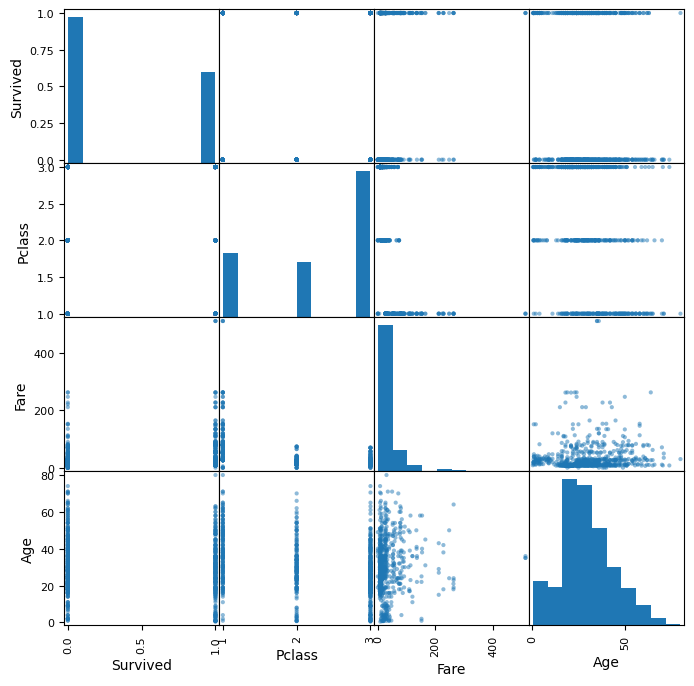

In [25]:
#Plotting the correlation between the most promising numerical attributes of our training set.
interest_attributes = ["Survived", "Pclass", "Fare", "Age"]

scatter_matrix(training_data[interest_attributes], figsize=(8,8))

<div class="alert alert-block alert-danger"><b>Important:</b> In the previous steps, we have applied several methods or techniques to gain insights from the data.

Beyond this point, we will begin the process of modifying, transforming, changing, or editing the training data in order to train the model and obtain the best possible model. </div>

<div class="alert alert-block alert-warning"><b>Important:</b> Data Traceability </div>

Name of dataframe | Original | 
---|---|
training_data | Original Trainind Dataset | 

## __4.2. Attribute Combinations__

Basically, this is the last step in the process of gain insights about the training data.

We can create "new attributes" from the combinations of the most promising existing attributes. The "new attributes" could came from the helpful insights that we have seen in the section "__4.1. Looking for correlations (in numerical attributes)__".
> If we want to know how good are those "new attributes", we can compute the __"Standard Correlation Coefficient" (i.e., Pearson's Correlation Coefficient {r})__ against an interesting attribute (i.e. the "target value" that we want to predict using the Test Set).

According to the performance of the model in the Test Set we can assses if it is wortwhile to use new attribute combinations (i.e., it is an iterative process.)

In [26]:
#Training dataset (original dataframe)
training_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [27]:
#Highly recommended: Before applying "attribute combination" do a copy of the original training dataset.
#We are agoing to add some columns to original dataframe; therefore a dataframes's copy is very useful.

training_data2 = training_data.copy()
training_data2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [28]:
#The new attributes (that will be added as columns to the training set {i.e. added to existing dataframe}) are the followings:
    #class per fare
    #number of parents / children per number of siblings / spouses

training_data2["class per fare"]= training_data2["Pclass"]/training_data2["Fare"]
training_data2["number of parents / children per number of siblings / spouses"]= training_data2["SibSp"]/training_data2["Parch"]

In [29]:
#We can see interesting outputs (i.e., correlations) between the target value "Survived" and the newly created attributes ("class per fare", and "number of parents / children per number of siblings / spouses")

correlation_matrix2 = training_data2.corr()
correlation_matrix2["Survived"].sort_values(ascending = False)

Survived                                                         1.000000
Fare                                                             0.257307
Parch                                                            0.081629
PassengerId                                                     -0.005007
SibSp                                                           -0.035322
Age                                                             -0.077221
class per fare                                                  -0.325686
Pclass                                                          -0.338481
number of parents / children per number of siblings / spouses   -0.368222
Name: Survived, dtype: float64

In [30]:
#General information or description of the "old and newly created attributes". 
training_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   PassengerId                                                    891 non-null    int64  
 1   Survived                                                       891 non-null    int64  
 2   Pclass                                                         891 non-null    int64  
 3   Name                                                           891 non-null    object 
 4   Sex                                                            891 non-null    object 
 5   Age                                                            714 non-null    float64
 6   SibSp                                                          891 non-null    int64  
 7   Parch                                                         

<AxesSubplot:xlabel='number of parents / children per number of siblings / spouses', ylabel='Survived'>

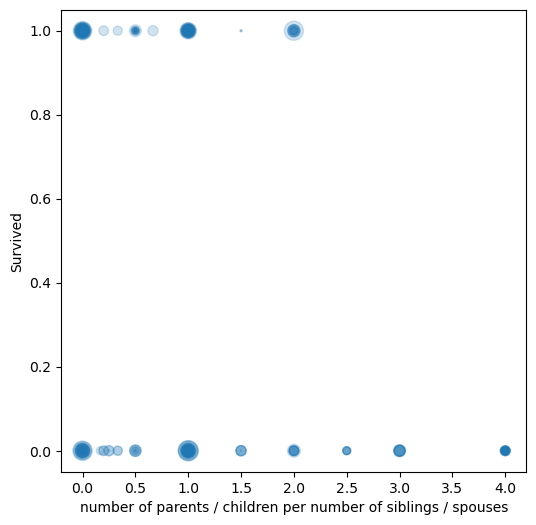

In [31]:
#Plotting the correlation between the newly attribute created and the target value (Survived)

    #The newly created attribute in the plot is "number of parents / children per number of siblings / spouses"

training_data2.plot(kind="scatter", x="number of parents / children per number of siblings / spouses", y="Survived", s=500*training_data2["class per fare"], figsize = (6,6), alpha=0.2)

<AxesSubplot:xlabel='class per fare', ylabel='Survived'>

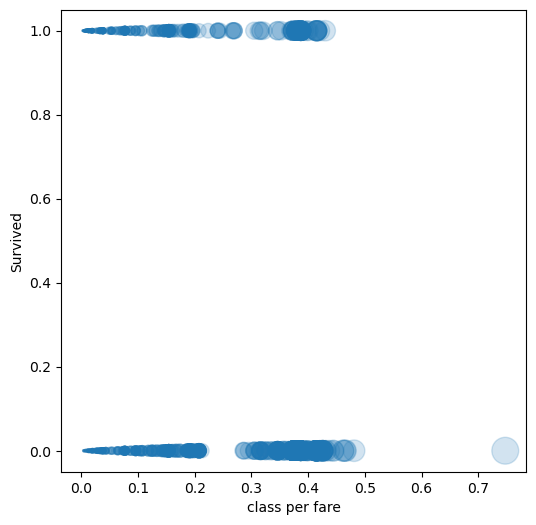

In [32]:
#Plotting the correlation between the newly attribute created and the target value (Survived)

    #The newly created attribute in the plot is "class per fare"

training_data2.plot(kind="scatter", x="class per fare", y="Survived", s=500*training_data2["class per fare"], figsize = (6,6), alpha=0.2)

In [33]:
#New training set dataframe (including the new columns, i.e. the newly created attributes).
training_data2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,class per fare,number of parents / children per number of siblings / spouses
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.413793,inf
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.014029,inf
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.378549,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.018832,inf
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.372671,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.153846,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.033333,NaN
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.127932,0.5
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.033333,NaN


# __5. Preparing the data__

## __5.1. Data Cleaning__

From section "__2.1.1. Getting information/description of data__" we know which attributes have NA values. To be specific they are the followings:
> Age (numerical attribute)

> Cabin

> Embarked

Four options to deal with NA values in "Numerical Attributes" are the followings:
1. __Option 1__: The dropna() method removes the rows that contains null values. 

> The dropna() method returns a new dataframe object unless the "inplace" parameter is set to True, in that case the dropna() method does the removing in the original datadrame instead.

> The "subset" parameter specifies where (column) to look for NULL values.

2. __Option 2__: The "drop()" function is a drastic method in constrast with "dropna().

> The first argument are the labels or indexes to drop. If more than one, specify them in a list. 

> The "axis" parameter: allow us to establish which axis to check (1 for columns or 0 for rows).

3. __Option 3__: The "fillna()" method replaces the null values with a specified value. 

<div class="alert alert-block alert-warning"><b>Important:</b> Data Traceability </div>

Name of dataframe | Original | Transformation Applied N°1 | 
---|---|---|
training_data | Original Trainind Dataset | 
training_data2 | Original Trainind Dataset | Attribute Combination |

In [34]:
#Option 1
training_data21 = training_data2.copy()

training_data21.dropna(subset=["Age"], inplace=True)

training_data21

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,class per fare,number of parents / children per number of siblings / spouses
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.413793,inf
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.014029,inf
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.378549,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.018832,inf
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.372671,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,0.103004,0.0
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.153846,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.033333,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.033333,NaN


In [35]:
#Option 2
training_data22 = training_data2.copy()

training_data22.drop("Age", axis=1, inplace=True)

training_data22

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,class per fare,number of parents / children per number of siblings / spouses
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,0.413793,inf
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,0.014029,inf
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,0.378549,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,0.018832,inf
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,0.372671,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,NaN,S,0.153846,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,B42,S,0.033333,NaN
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,NaN,S,0.127932,0.5
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C148,C,0.033333,NaN


In [36]:
#Option 3
training_data23 = training_data2.copy()

#We choose to fill NaN values with the "median value"of the attribute "Age"
medianvalue = training_data23["Age"].median()
training_data23["Age"].fillna(medianvalue, inplace=True)

training_data23

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,class per fare,number of parents / children per number of siblings / spouses
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.413793,inf
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.014029,inf
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.378549,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.018832,inf
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.372671,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.153846,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.033333,NaN
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,0.127932,0.5
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.033333,NaN


## __5.2. Dealing with Text and Categorical Attributes__

### __5.2.1. Encoding__

Until now we have seen only how to get insights of "numerical attributes", In the following lines we are going to see how to deal with "text and categorical attributes" considering that most ML algorithms use to work better with numeric values only. 

Based in what we described in the previous lines, we are going to transform or encode" the text or categories into numbers. Just to check:

> The "categorical attributes" in our training data set are: "Sex" and "Embarked".

> The "text attributes" in our training data set are: "Name", "Ticket", "Cabin".

This process works very well when attributes has a limited number of possible categories.

### __5.2.1.1. Encoding (Feature "Sex")__

In [37]:
#Working with the "categorical attributes"

#Printing the categorical attribute "Sex" as a dataframe.
training_data_cat1 = training_data21[["Sex"]]
training_data_cat1

,Sex
0,male
1,female
2,female
3,female
4,male
...,...
885,female
886,male
887,female
889,male


In [38]:
#The function "OrdinalEncoder()" encode categorical features as an integer array (0 to n_categories - 1).

ordinal_encoder1 = OrdinalEncoder()
training_data_cat1_encoded = ordinal_encoder1.fit_transform(training_data_cat1)
training_data_cat1_encoded[0:10]

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.]])

In [39]:
#Getting the list of categories of the feature "Sex" (before encoding.) using the "categories_" attribute.

    #It is considered a "fitted parameter" (also called "learned parameter")

    #The columns in the array are returned alphabetically (in this case "female, male").

ordinal_encoder1.categories_

[array(['female', 'male'], dtype=object)]

In [40]:
#More information about the list of categories of the feature "Sex".To be specific the length and type of the list and elements of the list.

inf1 = type(ordinal_encoder1.categories_)
print(inf1)
inf2 = type(ordinal_encoder1.categories_[0])
print(inf2)

inf3 = len(ordinal_encoder1.categories_)
print(inf3)
inf4 = len(ordinal_encoder1.categories_[0])
print(inf4)

<class 'list'>
<class 'numpy.ndarray'>
1
2


### __5.2.1.2. Encoding (Feature "Embarked")__

In [41]:
#Printing the categorical attribute"Embarked" as a dataframe.

training_data_cat2 = training_data21[["Embarked"]]
training_data_cat2

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
885,Q
886,S
887,S
889,C


In [42]:
#The function "OrdinalEncoder()" encode categorical features as an integer array (0 to n_categories - 1).

ordinal_encoder2 = OrdinalEncoder()
training_data_cat2_encoded = ordinal_encoder2.fit_transform(training_data_cat2)
training_data_cat2_encoded[0:10]

array([[2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [2.]])

In [43]:
#Getting the list of categories of the feature "Embarked" (before encoding.) using the "categories_" attribute.

    #It is considered a "fitted parameter" (also called "learned parameter")

    #The columns in the array are returned alphabetically (in this case "C", "Q", "S" and nan").

ordinal_encoder2.categories_

[array(['C', 'Q', 'S', nan], dtype=object)]

### __5.2.2. Quick review about some relevant commands and concepts from Scikit-Learn__

Scikit learn is an amazing ML toolkit for Python language.

1. __Estimators__

> Its main goal is to estimate some parameters based on the dataset.

> An estimator is an object that can learn from data and make predictions. 

> All estimators have a "fit" method (also called the "training method" or "learning method").

> The function "fit()" trains or fits the algorithm on the training data with the aim of estimate the "parameters" or learning "model's parameters", also known the "weights" (i.e. the coefficients located alongside the features).

> The arguments of the function "fit()" are the "features of the training dataset", and the "target values of the training dataset" (in the case of Supervised ML). 

> Fitted parameters (also called "learned parameters") use an underscore " _ " as a suffix.

2. __Transformers__

> The method "transform()" allow us to modify the data, such as scaling, encoding, imputing, or extracting features. We can also create our own custom transformers by implementing the "fit" and "transform" methods. 

> It can make your code more readable, reusable, and robust. They can also help you avoid data leakage and perform cross-validation more easily.

> The argument of the function "transform()" is the dataset. The output is the transformed dataset. 

> The method "fit_transform()" is equivalent to calling the functions "fit()" and "transform()". This is a convenient and efficient method for modelling (i.e., estimates parameters or learns model parameters) and transforming the training data simultaneously using the respective "learned parameters".

> If we use the "fit()" function on the test data, we will compute new parameters and will let our model learn about the test data (i.e., it will be a model biased towards particular features or values of the test data). Therefore, we do not use the "fit()" method on the test data.


3. __Predictors__

> It has the "predict()" method which allow us to to make predictions. This function takes advantage of the fitted parameters (also called "learned parameters") got by the method "fit()".

> The argument of the function "predict()" is usually the "features of the test dataset".

4. __Pipeline__

> It is a way of chaining a sequence of steps that can include data "transformations" and a "final estimator". 

> The multiple steps that can chain the pipeline object are any "estimators" that implement the "fit" and "transform" methods. The last step of the "pipeline" must be an "estimator" that implements the "fit" method.

> The "pipeline" object simplifies the code by avoiding repeated calls to "transform" and "fit" methods. 

> "make_pipeline" function from scikit-learn help us to create a pipeline object that can chain multiple steps.

<div class="alert alert-block alert-warning"><b>Important:</b> Datasets in scikit-learn are represented as "Numpy arrays" or "Scipy sparse matrices". In other words, when we use scikit-learn we are going to get the output of our codes in any of these two data types formats. </div>

According to scikit-learn website (<a href="">https://scikit-learn.org/stable/faq.html </a>), we should consider the following:
>"_The homogeneous NumPy and SciPy data objects currently expected are most efficient to process for most operations_"

>"_Restricting input to homogeneous types therefore reduces maintenance cost and encourages usage of efficient data structures._"

>"_Most of scikit-learn assumes data is in NumPy arrays or SciPy sparse matrices of a single numeric dtype. These do not explicitly represent categorical variables at present. Thus, unlike R’s data.frames or pandas.DataFrame, we require explicit conversion of categorical features to numeric values,..._"

### __5.2.3. One-Hot Encoding__

The previous "encoding procedure" is simple and useful; however, it has the following pitfall: ML algorithms may consider that encoded categories next to each other are similar. 

> It could be a problem if the "categorial attributes" are relevant features for our model and, if the categories of those "categorial attributes" are not ordered.

Considering what is described previously, the recommended method for encoding is "One-Hot Encoding".

> "One-Hot Encoding" creates a binary system (with the values 0 or 1) per category. If the category is chosen, then it will have the value 1 (one); therefore, all the other categories will have the value 0 (zero).

> 1 (one) is hot and 0 (zero) is cold.

> The output of the "One-Hot Encoding" procedure is a huge matrix full of zeros and just a couple of ones (per category). This type of matrix is known as "Sparse Matrix".

#### __5.2.3.1. One-Hot Encoding (Feature "Sex")__

In [44]:
#Applying "One-Hot Encoding" to the feature "Sex"

    #The output was a huge matrix (891 rows x 2 columns) full of zeros and just a couple of ones.

    #Types of sparse matrices in Scipy: CSR(Compressed Sparse Row) and CSC(Compressed Sparse Column).

    #Columns for the category of "male" and "female".

OneHot_encoder1 = OneHotEncoder()
training_data_cat1_OneHotencoded = OneHot_encoder1.fit_transform(training_data_cat1)
training_data_cat1_OneHotencoded

<714x2 sparse matrix of type '<class 'numpy.float64'>'
	with 714 stored elements in Compressed Sparse Row format>

In [45]:
#Transforming the "Scipy Sparse Matrix" {CSR(Compressed Sparse Row)} into dense Numpy Array

    #In essence, the output is an array with the same shape and containing the same data represented by the sparse matrix.

    #Output = 2 columns of binary values in the array because there are only 2 categories). 

    #The columns in the array are returned alphabetically (in this case "female, male").

training_data_cat1_OneHotencoded.toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

#### __5.2.3.2. One-Hot Encoding (Feature "Embarked")__

In [46]:
#Applying "One-Hot Encoding" to the feature "Embarked"

    #The output was a huge matrix (891 rows x 4 columns) full of zeros and just a couple of ones.

    #Columns for the category of "S", "Q", "C" and nan...

OneHot_encoder2 = OneHotEncoder()
training_data_cat2_OneHotencoded = OneHot_encoder2.fit_transform(training_data_cat2)
training_data_cat2_OneHotencoded

<714x4 sparse matrix of type '<class 'numpy.float64'>'
	with 714 stored elements in Compressed Sparse Row format>

In [47]:
#Transforming the "Scipy Sparse Matrix" {CSR(Compressed Sparse Row)} into dense Numpy Array.

    #In essence, the output is an array with the same shape and containing the same data represented by the sparse matrix.

    #Output = 4 columns of binary values in the array because there are only 4 categories). 

    #The columns in the array are returned alphabetically (in this case "C", "Q", "S" and nan").

training_data_cat2_OneHotencoded.toarray()

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

<div class="alert alert-block alert-warning"><b>Important:</b> Data Traceability </div>

Name of dataframe | Original | Transformation Applied N°1 | Transformation Applied N°2 |
---|---|---|---|
training_data | Original Trainind Dataset | 
training_data2 | Original Trainind Dataset | Attribute Combination |
training_data21 | Original Trainind Dataset | Attribute Combination | Data Cleaning |

#### __5.2.3.3. One-Hot Encoding (continue - Feature "Sex")__

In [48]:
#For the following steps, we are going to choose only the outputs of the process of..
#..."One-Hot Encoding (Feature "Sex")" because based in the previous preprocessing outputs, it...
#...could be an important feature.

    #Creating a copy of the dataframe that only has the feature "Sex".

training_data_cat11 = training_data_cat1.copy()
training_data_cat11

,Sex
0,male
1,female
2,female
3,female
4,male
...,...
885,female
886,male
887,female
889,male


In [49]:
#We put together the "categories of the encoder" (to be specific: male and female) from...
#...step 5.2.1.1. Encoding (Feature "Sex") and the "dense Numpy Array" from...
#...step 5.2.3.1. One-Hot Encoding (Feature "Sex")

training_data_cat11[ordinal_encoder1.categories_[0]]=training_data_cat1_OneHotencoded.toarray()
print(training_data_cat11)

#In addition, we print the type of the ouptput (i.e. a dataframe).

print(type(training_data_cat11))

        Sex  female  male
0      male     0.0   1.0
1    female     1.0   0.0
2    female     1.0   0.0
3    female     1.0   0.0
4      male     0.0   1.0
..      ...     ...   ...
885  female     1.0   0.0
886    male     0.0   1.0
887  female     1.0   0.0
889    male     0.0   1.0
890    male     0.0   1.0

[714 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>


In [50]:
#Dropping the column "Sex" from the previous dataframe. I do this because in the following step we are...
#...going to concatenate this small dataframe (output from the "One Hot Encoding Activities") and the...
#...main training data transformed. Therefore, taking into account that both have the column "Sex",..
#...I prefer to avoid misunderstanding about having 2 columns with the same name and values.

training_data_cat11.drop(training_data_cat11.columns[0], axis=1, inplace=True)

training_data_cat11

,female,male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
885,1.0,0.0
886,0.0,1.0
887,1.0,0.0
889,0.0,1.0


In [51]:
#Concatenate dataframes (output from the "One Hot Encoding Activities" and the "main training data transformed")

training_data_cat211 = pd.concat([training_data21, training_data_cat11], axis=1)
training_data_cat211

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,class per fare,number of parents / children per number of siblings / spouses,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.413793,inf,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.014029,inf,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.378549,NaN,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.018832,inf,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.372671,NaN,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,0.103004,0.0,1.0,0.0
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.153846,NaN,0.0,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.033333,NaN,1.0,0.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.033333,NaN,0.0,1.0


## __5.3. Feature Scaling__

__Key ideas__:

1. Many ML algorithms are highly sensitive or do not work well when the features of the model (independent variables) have different scales (for instance: a feature has values between 3 and 7, other feature has values between 400 and 1000 and another feature of the same model has values between 10000 and 500000). Therefore, applying "Feature Scaling" (i.e. a transformation) allows us to normalize the features and makes ML problems easy to address by ML algorithms.

2. It is recommended to apply the "Feature Scaling" procedure after the processes of "Attribute Combination" and "Encoding Categorial/Text Attributes".

3. ML algorithms (for instance: linear regression, logistic regression, PCA, ANN,...) that use "Gradient Descent" as an optimization technique should be checked with "Feture Scaling" because in that way we are able to guarantee a regular size steps during the gradient descent process and properly convergence.

4. Distance-based ML algorithms (for instance: SVM, KNN, K-means...) should be checked with "Feture Scaling" because they use distance between data points to show similarity between them.

5. There are several ways to apply "Feature Scaling"; however, we are going to see the following two:

    5.1. Normalization (also called "Min - Max Scaling")

> It adjusts the values of the features (numeric features) to end up ranging between 0 and 1.

> It is sensitive to outliers points, because Normalization formula works with maximun and minimun values of the feature.

> It is useful when the features have data distributions that do not follow a Gaussian Distribution or when there is no assumption about the data distributions of features.

> It can be useful in "Encoded Categorial/Text Attributes" (One-Hot Encoding).

    5.2. Standardization (also called "Z-Score Normalization") 
<-- <span style="color:black">__It is NOT DONE in this Notebook.__</span> 

> It adjusts the values of the features (numeric features) to end up ranging between no specific values. It standardize values to have mean value equal to 0 and standard deviation of 1.

> It is not sensitive to outliers in the data, because Standardization formula works with the mean and the standard deviation value of each the feature.

> It is useful when the features have data distributions that follow a Gaussian Distribution.

6. Despite the conditions described previously, I would recommend train the ML algorithm using the "raw training data", "normalize training data", and "standardize training data". Then, check and compare the peformance of each one with error analysis.

<div class="alert alert-block alert-warning"><b>Important:</b> Data Traceability </div>

Name of dataframe | Original | Transformation N°1 | Transformation N°2 | Transformation N°3
---|---|---|---|---|
training_data | Original Training Dataset | 
training_data2 | Original Training Dataset | Attribute Combination |
training_data21 | Original Training Dataset | Attribute Combination | Data Cleaning |
training_data_cat211 | Original Training Dataset | Attribute Combination | Data Cleaning | Categorical Attributes

### __5.3.1. Normalization (also called "Min - Max Scaling") on Training Dataset__

In [52]:
#Normalization (Training Dataset) - Part 1

#Making a copy of the last version of the training set.
training_data_norm = training_data_cat211.copy()

In [53]:
#Normalization (Training Dataset) - Part 2

#Choosing only the numerical independent features (include those that came from "attribute distribution").
training_data_norm = training_data_norm[["Pclass","Age", "SibSp", "Parch", "Fare", "class per fare","female", "male"]]

In [54]:
#Normalization (Training Dataset) - Part 3.1

#Addressing infinity values. 
#I did this because infinity values do not allow the "Normalization Feature Scaling" function properly works.

    #Checking if there are cells inside the dataframe with finite values. In this case, due to huge amount of data that we have it is hard to see the "False" items.
    #"False" = infinity values
    #"True" = finite values
infinityrow_norm = np.isfinite(training_data_norm)
infinityrow_norm

,Pclass,Age,SibSp,Parch,Fare,class per fare,female,male
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
885,True,True,True,True,True,True,True,True
886,True,True,True,True,True,True,True,True
887,True,True,True,True,True,True,True,True
889,True,True,True,True,True,True,True,True


In [55]:
#Normalization (Training Dataset) - Part 3.2

    #Counting the cells that have infinity values
    #In this case the output is: 7 cells with infinity values
quantity_norm = np.isinf(training_data_norm).values.sum()
print(quantity_norm)

7


In [56]:
#Normalization (Training Dataset) - Part 3.3

    #Discovering which columns have cells with infinity values 
    #In this case the output is: the column or feature "class per fare".
    #We do this because the detection of an "infinity value" was difficult in the section "Normalization - Part 3.1" 
col_norm = training_data_norm.columns.to_series()[np.isinf(training_data_norm).any()]
print(col_norm)

class per fare    class per fare
dtype: object


In [57]:
#Normalization (Training Dataset) - Part 3.4

    #Replacing the infinity values with NaN
    #In this step we still have 714 data rows, just like in the sections:
        #"Normalization - Part 1
        #"Normalization - Part 2
        #"Normalization - Part 3.1
        #"Normalization - Part 3.2
        #"Normalization - Part 3.3
training_data_norm.replace([np.inf, -np.inf], np.nan, inplace=True)
training_data_norm

,Pclass,Age,SibSp,Parch,Fare,class per fare,female,male
0,3,22.0,1,0,7.2500,0.413793,0.0,1.0
1,1,38.0,1,0,71.2833,0.014029,1.0,0.0
2,3,26.0,0,0,7.9250,0.378549,1.0,0.0
3,1,35.0,1,0,53.1000,0.018832,1.0,0.0
4,3,35.0,0,0,8.0500,0.372671,0.0,1.0
...,...,...,...,...,...,...,...,...
885,3,39.0,0,5,29.1250,0.103004,1.0,0.0
886,2,27.0,0,0,13.0000,0.153846,0.0,1.0
887,1,19.0,0,0,30.0000,0.033333,1.0,0.0
889,1,26.0,0,0,30.0000,0.033333,0.0,1.0


In [58]:
#Normalization (Training Dataset) - Part 3.5

    #Dropping all the rows with NaN values
    #In this step we have a new quantity of rows (to be specific: 707 rows) because we dropped rows with NaN values.
training_data_norm.dropna(inplace=True)
training_data_norm

,Pclass,Age,SibSp,Parch,Fare,class per fare,female,male
0,3,22.0,1,0,7.2500,0.413793,0.0,1.0
1,1,38.0,1,0,71.2833,0.014029,1.0,0.0
2,3,26.0,0,0,7.9250,0.378549,1.0,0.0
3,1,35.0,1,0,53.1000,0.018832,1.0,0.0
4,3,35.0,0,0,8.0500,0.372671,0.0,1.0
...,...,...,...,...,...,...,...,...
885,3,39.0,0,5,29.1250,0.103004,1.0,0.0
886,2,27.0,0,0,13.0000,0.153846,0.0,1.0
887,1,19.0,0,0,30.0000,0.033333,1.0,0.0
889,1,26.0,0,0,30.0000,0.033333,0.0,1.0


In [59]:
#Normalization (Training Dataset) - Part 4

#Fitting the training data with the "Normalization Feature Scaling"
fit_data_norm = MinMaxScaler().fit(training_data_norm)

#Transforming and printing the training data
training_data_norm2 = fit_data_norm.transform(training_data_norm)
print(training_data_norm2)

    #Printing the datatype of the normalized training set.
print(type(training_data_norm2))

    #Printing the shape (dimensions) of the normalized training set.
print(training_data_norm2.shape)

[[1.         0.27117366 0.2        ... 0.55227944 0.         1.        ]
 [0.         0.4722292  0.2        ... 0.01619481 1.         0.        ]
 [1.         0.32143755 0.         ... 0.50501693 1.         0.        ]
 ...
 [0.         0.23347575 0.         ... 0.04208257 1.         0.        ]
 [0.         0.32143755 0.         ... 0.04208257 0.         1.        ]
 [1.         0.39683338 0.         ... 0.51647964 0.         1.        ]]
<class 'numpy.ndarray'>
(707, 8)


<function matplotlib.pyplot.show(close=None, block=None)>

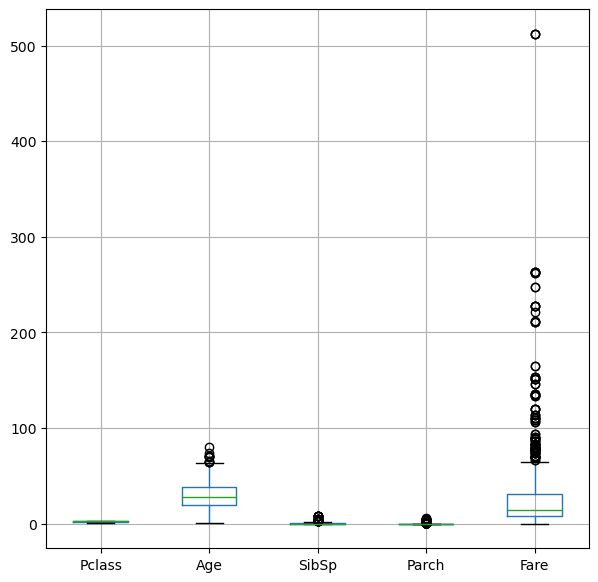

In [60]:
#Normalization (Training Dataset) - Part 5.1

#BoxPlot of the Training Set (Raw Numeric Features)

#This is the same box plot of section "2.1.4. Summary of numerical attributes (in a graph way)"

boxplot = training_data.boxplot(column=['Pclass',"Age", "SibSp", "Parch", "Fare"],figsize = (7,7)) 
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

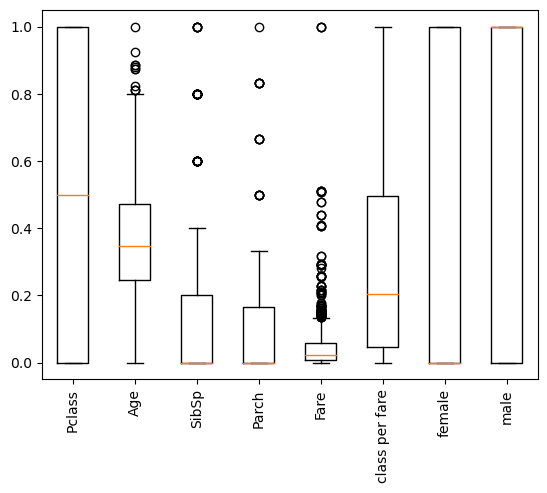

In [61]:
#Normalization (Training Dataset) - Part 5.2

#BoxPlot of the Training Set (Normalize Features)

#We can see an dramatic difference between the previous and the current boxplot (i.e., before and after the Normalization Process).

fig, ax = plt.subplots()
ax.boxplot(training_data_norm2) 
ax.set_xticklabels(["Pclass","Age", "SibSp", "Parch", "Fare", "class per fare","female", "male"],rotation=90)
plt.show

In [62]:
#Normalization (Training Dataset) - Part 6

#Convert the NumPy Array to Pandas DataFrame
#This Numpy Array came from "Normalization (Training Dataset) - Part 4"
#The main goal is to convert the newly created numpy array (also called "training_data_norm2") to a dataframe using the index of the training set from section "Normalization (Training Dataset) - Part 3.5"

training_data_norm21 = pd.DataFrame(training_data_norm2, columns = ["Pclass","Age", "SibSp", "Parch", "Fare", "class per fare","female", "male"],index = training_data_norm.index)

print(training_data_norm21)
print(type(training_data_norm21))

     Pclass       Age  SibSp     Parch      Fare  class per fare  female  male
0       1.0  0.271174    0.2  0.000000  0.006369        0.552279     0.0   1.0
1       0.0  0.472229    0.2  0.000000  0.132340        0.016195     1.0   0.0
2       1.0  0.321438    0.0  0.000000  0.007697        0.505017     1.0   0.0
3       0.0  0.434531    0.2  0.000000  0.096569        0.022637     1.0   0.0
4       1.0  0.434531    0.0  0.000000  0.007943        0.497134     0.0   1.0
..      ...       ...    ...       ...       ...             ...     ...   ...
885     1.0  0.484795    0.0  0.833333  0.049403        0.135511     1.0   0.0
886     0.5  0.334004    0.0  0.000000  0.017681        0.203690     0.0   1.0
887     0.0  0.233476    0.0  0.000000  0.051125        0.042083     1.0   0.0
889     0.0  0.321438    0.0  0.000000  0.051125        0.042083     0.0   1.0
890     1.0  0.396833    0.0  0.000000  0.007353        0.516480     0.0   1.0

[707 rows x 8 columns]
<class 'pandas.core.frame.Da

## __6. Train the Model__

<div class="alert alert-block alert-warning"><b>Important:</b> Data Traceability </div>

Name of dataframe | Original | Transformation N°1 | Transformation N°2 | Transformation N°3 | Transformation N°4
---|---|---|---|---|---|
training_data | Original Training Dataset | 
training_data2 | Original Training Dataset | Attribute Combination |
training_data21 | Original Training Dataset | Attribute Combination | Data Cleaning |
training_data_cat211 | Original Training Dataset | Attribute Combination | Data Cleaning | Categorical Attributes
training_data_norm21 | Original Training Dataset | Attribute Combination | Data Cleaning | Categorical Attributes | Normalization

### __6.1. Training Dataset__

In [63]:
#"Final training set" after several transformation (described in the previous chart)

training_data_norm21

,Pclass,Age,SibSp,Parch,Fare,class per fare,female,male
0,1.0,0.271174,0.2,0.000000,0.006369,0.552279,0.0,1.0
1,0.0,0.472229,0.2,0.000000,0.132340,0.016195,1.0,0.0
2,1.0,0.321438,0.0,0.000000,0.007697,0.505017,1.0,0.0
3,0.0,0.434531,0.2,0.000000,0.096569,0.022637,1.0,0.0
4,1.0,0.434531,0.0,0.000000,0.007943,0.497134,0.0,1.0
...,...,...,...,...,...,...,...,...
885,1.0,0.484795,0.0,0.833333,0.049403,0.135511,1.0,0.0
886,0.5,0.334004,0.0,0.000000,0.017681,0.203690,0.0,1.0
887,0.0,0.233476,0.0,0.000000,0.051125,0.042083,1.0,0.0
889,0.0,0.321438,0.0,0.000000,0.051125,0.042083,0.0,1.0


In [64]:
#Getting the "target value" from the training set build in the last step of "One-Hot Encoding"

training_data_targetY = training_data_cat211["Survived"]
training_data_targetY

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [65]:
#Joining the independent features (numeric features) called "training_data_norm21" and the target values (responses) called "training_data_cat211" of the training set.

#I do this joining because the length of both named dataframes is different and I want to match their indexes
    #the dataframe "training_data_norm21" has 707 rows
    #the dataframe "training_data_cat211" has 714 rows

training_x_y_values = training_data_norm21.join(training_data_cat211["Survived"],how="inner",rsuffix='_extra')
training_x_y_values

,Pclass,Age,SibSp,Parch,Fare,class per fare,female,male,Survived
0,1.0,0.271174,0.2,0.000000,0.006369,0.552279,0.0,1.0,0
1,0.0,0.472229,0.2,0.000000,0.132340,0.016195,1.0,0.0,1
2,1.0,0.321438,0.0,0.000000,0.007697,0.505017,1.0,0.0,1
3,0.0,0.434531,0.2,0.000000,0.096569,0.022637,1.0,0.0,1
4,1.0,0.434531,0.0,0.000000,0.007943,0.497134,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...
885,1.0,0.484795,0.0,0.833333,0.049403,0.135511,1.0,0.0,0
886,0.5,0.334004,0.0,0.000000,0.017681,0.203690,0.0,1.0,0
887,0.0,0.233476,0.0,0.000000,0.051125,0.042083,1.0,0.0,1
889,0.0,0.321438,0.0,0.000000,0.051125,0.042083,0.0,1.0,1


In [66]:
#Splitting the training set ("independent features" from the "target value") 

#Getting the "target value" from the training set build in the previous step.

training_data_targetY = training_x_y_values["Survived"]
training_data_targetY

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 707, dtype: int64

In [67]:
#Dropping the "target column" from the training set.

#Getting the "independent features" (only the numeric) from the training set.

training_data_newX = training_x_y_values.drop(["Survived"], axis='columns')
training_data_newX

,Pclass,Age,SibSp,Parch,Fare,class per fare,female,male
0,1.0,0.271174,0.2,0.000000,0.006369,0.552279,0.0,1.0
1,0.0,0.472229,0.2,0.000000,0.132340,0.016195,1.0,0.0
2,1.0,0.321438,0.0,0.000000,0.007697,0.505017,1.0,0.0
3,0.0,0.434531,0.2,0.000000,0.096569,0.022637,1.0,0.0
4,1.0,0.434531,0.0,0.000000,0.007943,0.497134,0.0,1.0
...,...,...,...,...,...,...,...,...
885,1.0,0.484795,0.0,0.833333,0.049403,0.135511,1.0,0.0
886,0.5,0.334004,0.0,0.000000,0.017681,0.203690,0.0,1.0
887,0.0,0.233476,0.0,0.000000,0.051125,0.042083,1.0,0.0
889,0.0,0.321438,0.0,0.000000,0.051125,0.042083,0.0,1.0


### __6.2. Test Dataset__

In [68]:
#Importing the original Test Set

official_test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

#Doing a copy of the original Test Set
test_data1 = official_test_data.copy()

#### __6.2.1. Attribute Combination__

In [69]:
#The new attribute (that will be added as a column to the test set {i.e. added to existing dataframe}) is the following:
    #class per fare

#New test set dataframe (including the new column, i.e. the newly created attribute).
test_data1["class per fare"]= test_data1["Pclass"]/test_data1["Fare"]
test_data1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,class per fare
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.383181
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.428571
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.206452
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.346320
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.244151
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0.372671
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0.009183
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0.413793
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0.372671


#### __6.2.2. Getting information/description of data__

In [70]:
test_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     418 non-null    int64  
 1   Pclass          418 non-null    int64  
 2   Name            418 non-null    object 
 3   Sex             418 non-null    object 
 4   Age             332 non-null    float64
 5   SibSp           418 non-null    int64  
 6   Parch           418 non-null    int64  
 7   Ticket          418 non-null    object 
 8   Fare            417 non-null    float64
 9   Cabin           91 non-null     object 
 10  Embarked        418 non-null    object 
 11  class per fare  417 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 39.3+ KB


#### __6.2.3. Data Cleaning__

From section "2.1.1. Getting information/description of data" we know which attributes have NA values. To be specific they are the followings:
> Age (numerical attribute)

> Fare (numerical attribute)

> Cabin

> class per fare (numerical attribute)

In [71]:
test_data2 = test_data1.copy()

test_data2.dropna(subset=["Age", "Fare", "class per fare"], inplace=True)

test_data2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,class per fare
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.383181
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.428571
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.206452
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.346320
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.244151
...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,0.217786
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q,0.011111
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S,0.385852
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0.009183


#### __6.2.4. One-Hot Encoding (Feature "Sex")__

In [72]:
#Working with the "categorical attributes"

#Printing the categorical attribute "Sex" as a dataframe.
test_data_sex = test_data2[["Sex"]]
test_data_sex

,Sex
0,male
1,female
2,male
3,male
4,female
...,...
409,female
411,female
412,female
414,female


In [73]:
#Applying "One-Hot Encoding" to the feature "Sex"

#The output was a huge matrix (331 rows x 2 columns) full of zeros and just a couple of ones.

#Types of sparse matrices in Scipy: CSR(Compressed Sparse Row) and CSC(Compressed Sparse Column).

#Columns for the category of "male" and "female".

OneHot_encoder1 = OneHotEncoder()
test_data_sex_OneHotencoded = OneHot_encoder1.fit_transform(test_data_sex)
test_data_sex_OneHotencoded

<331x2 sparse matrix of type '<class 'numpy.float64'>'
	with 331 stored elements in Compressed Sparse Row format>

In [74]:
#Transforming the "Scipy Sparse Matrix" {CSR(Compressed Sparse Row)} into dense Numpy Array

#In essence, the output is an array with the same shape and containing the same data represented by the sparse matrix.

#Output = 2 columns of binary values in the array because there are only 2 categories). 

#The columns in the array are returned alphabetically (in this case "female, male").

test_data_sex_OneHotencoded.toarray()

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [75]:
#For the following steps, we are going to choose only the outputs of the process of..
#..."One-Hot Encoding (Feature "Sex")" because based in the previous preprocessing outputs, it...
#...could be an important feature.

#Creating a copy of the dataframe that only has the feature "Sex".

test_data_sex2 = test_data_sex.copy()

In [76]:
#We put together the "categories of the encoder" (to be specific: male and female) from...
#...and the "dense Numpy Array"

test_data_sex2[ordinal_encoder1.categories_[0]]=test_data_sex_OneHotencoded.toarray()
print(test_data_sex2)

#In addition, we print the type of the ouptput (i.e. a dataframe).

print(type(test_data_sex2))

        Sex  female  male
0      male     0.0   1.0
1    female     1.0   0.0
2      male     0.0   1.0
3      male     0.0   1.0
4    female     1.0   0.0
..      ...     ...   ...
409  female     1.0   0.0
411  female     1.0   0.0
412  female     1.0   0.0
414  female     1.0   0.0
415    male     0.0   1.0

[331 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>


In [77]:
#Dropping the column "Sex" from the previous dataframe. I do this because in the following step we are...
#...going to concatenate this small dataframe (output from the "One Hot Encoding Activities") and the...
#...main training data transformed. Therefore, taking into account that both have the column "Sex",..
#...I prefer to avoid misunderstanding about having 2 columns with the same name and values.

test_data_sex2.drop(test_data_sex2.columns[0], axis=1, inplace=True)

test_data_sex2

,female,male
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
...,...,...
409,1.0,0.0
411,1.0,0.0
412,1.0,0.0
414,1.0,0.0


In [78]:
#Concatenate dataframes (output from the "One Hot Encoding Activities" and the "main training data transformed")

test_data3 = pd.concat([test_data2, test_data_sex2], axis=1)
test_data3

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,class per fare,female,male
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.383181,0.0,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.428571,1.0,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.206452,0.0,1.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.346320,0.0,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.244151,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,0.217786,1.0,0.0
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q,0.011111,1.0,0.0
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S,0.385852,1.0,0.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0.009183,1.0,0.0


#### __6.2.5. Feature Scaling (Normalization)__

In [79]:
#Normalization (Test Dataset) - Part 1

#Making a copy of the last version of the Test set.
test_data4 = test_data3.copy()

In [80]:
#Normalization (Test Dataset) - Part 2

#Choosing only the numerical independent features (include those that came from "attribute distribution").
test_data4 = test_data4[["Pclass","Age", "SibSp", "Parch", "Fare", "class per fare","female", "male"]]

In [81]:
#Normalization (Test Dataset) - Part 3.1

#Addressing infinity values. 
#I did this because infinity values do not allow the "Normalization Feature Scaling" function properly works.

    #Checking if there are cells inside the dataframe with finite values. In this case, due to huge amount of data that we have it is hard to see the "False" items.
    #"False" = infinity values
    #"True" = finite values
infinityrow_norm_test = np.isfinite(test_data4)
infinityrow_norm_test

,Pclass,Age,SibSp,Parch,Fare,class per fare,female,male
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
409,True,True,True,True,True,True,True,True
411,True,True,True,True,True,True,True,True
412,True,True,True,True,True,True,True,True
414,True,True,True,True,True,True,True,True


In [82]:
#Normalization (Test Dataset) - Part 3.2

    #Counting the cells that have infinity values
    #In this case the output is: 1 cell with infinity value
quantity_norm_test = np.isinf(test_data4).values.sum()
quantity_norm_test

1

In [83]:
#Normalization (Test Dataset) - Part 3.3

    #Discovering which columns have cells with infinity values 
    #In this case the output is: the column or feature "class per fare".
    #We do this because the detection of an "infinity value" was difficult in the section "Normalization - Part 3.1" 
col_norm_test = test_data4.columns.to_series()[np.isinf(test_data4).any()]
col_norm_test

class per fare    class per fare
dtype: object

In [84]:
#Normalization (Test Dataset) - Part 3.4

    #Replacing the infinity values with NaN
    #In this step we still have 331 data rows, just like in the sections:
        #"Normalization - Part 1
        #"Normalization - Part 2
        #"Normalization - Part 3.1
        #"Normalization - Part 3.2
        #"Normalization - Part 3.3
test_data4.replace([np.inf, -np.inf], np.nan, inplace=True)
test_data4

,Pclass,Age,SibSp,Parch,Fare,class per fare,female,male
0,3,34.5,0,0,7.8292,0.383181,0.0,1.0
1,3,47.0,1,0,7.0000,0.428571,1.0,0.0
2,2,62.0,0,0,9.6875,0.206452,0.0,1.0
3,3,27.0,0,0,8.6625,0.346320,0.0,1.0
4,3,22.0,1,1,12.2875,0.244151,1.0,0.0
...,...,...,...,...,...,...,...,...
409,3,3.0,1,1,13.7750,0.217786,1.0,0.0
411,1,37.0,1,0,90.0000,0.011111,1.0,0.0
412,3,28.0,0,0,7.7750,0.385852,1.0,0.0
414,1,39.0,0,0,108.9000,0.009183,1.0,0.0


In [85]:
#Normalization (Test Dataset) - Part 3.5

    #Dropping all the row with NaN values
    #In this step we have a new quantity of rows (to be specific: 330 rows) because we dropped the row with NaN values.
test_data4.dropna(inplace=True)
test_data4

,Pclass,Age,SibSp,Parch,Fare,class per fare,female,male
0,3,34.5,0,0,7.8292,0.383181,0.0,1.0
1,3,47.0,1,0,7.0000,0.428571,1.0,0.0
2,2,62.0,0,0,9.6875,0.206452,0.0,1.0
3,3,27.0,0,0,8.6625,0.346320,0.0,1.0
4,3,22.0,1,1,12.2875,0.244151,1.0,0.0
...,...,...,...,...,...,...,...,...
409,3,3.0,1,1,13.7750,0.217786,1.0,0.0
411,1,37.0,1,0,90.0000,0.011111,1.0,0.0
412,3,28.0,0,0,7.7750,0.385852,1.0,0.0
414,1,39.0,0,0,108.9000,0.009183,1.0,0.0


In [86]:
#Normalization (Test Dataset) - Part 4

#Transforming and printing the Test data
test_data_norm = fit_data_norm.transform(test_data4)
test_data_norm

array([[1.        , 0.4282483 , 0.        , ..., 0.51122847, 0.        ,
        1.        ],
       [1.        , 0.58532295, 0.2       , ..., 0.57209719, 1.        ,
        0.        ],
       [0.5       , 0.77381252, 0.        , ..., 0.27423433, 0.        ,
        1.        ],
       ...,
       [1.        , 0.34656949, 0.        , ..., 0.51481052, 1.        ,
        0.        ],
       [0.        , 0.48479517, 0.        , ..., 0.0096966 , 1.        ,
        0.        ],
       [1.        , 0.47851219, 0.        , ..., 0.55227944, 0.        ,
        1.        ]])

In [87]:
#Printing the datatype of the normalized Test set.
type(test_data_norm)

numpy.ndarray

In [88]:
#Printing the shape (dimensions) of the normalized Test set.
test_data_norm.shape

(330, 8)

<function matplotlib.pyplot.show(close=None, block=None)>

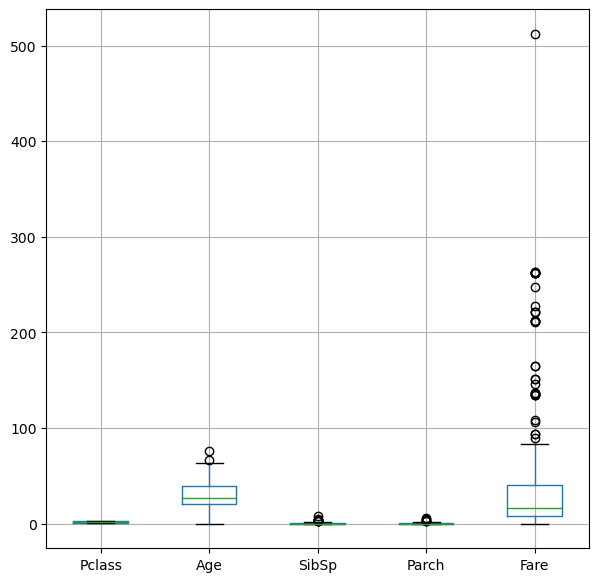

In [89]:
#Normalization (Test Dataset) - Part 5.1

#BoxPlot of the Test Set (Raw Numeric Features)

#This is the same box plot of section "2.1.4. Summary of numerical attributes (in a graph way)"

boxplot = test_data3.boxplot(column=['Pclass',"Age", "SibSp", "Parch", "Fare"],figsize = (7,7)) 
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

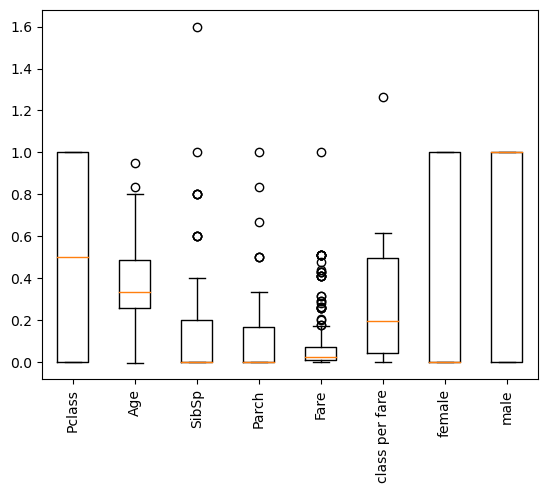

In [90]:
#Normalization (Test Dataset) - Part 5.2

#BoxPlot of the Test Set (Normalize Features)

#We can see an dramatic difference between the previous and the current boxplot (i.e., before and after the Normalization Process).

fig, ax = plt.subplots()
ax.boxplot(test_data_norm) 
ax.set_xticklabels(["Pclass","Age", "SibSp", "Parch", "Fare", "class per fare","female", "male"],rotation=90)
plt.show

In [91]:
#Normalization (Test Dataset) - Part 6

#Convert the NumPy Array to Pandas DataFrame
#This Numpy Array came from "Normalization (Test Dataset) - Part 4"
#The main goal is to convert the newly created numpy array (also called "test_data_norm") to a dataframe using the index of the test set from section "Normalization (Test Dataset) - Part 3.5"

test_data_norm2 = pd.DataFrame(test_data_norm, columns = ["Pclass","Age", "SibSp", "Parch", "Fare", "class per fare","female", "male"],index = test_data4.index)

print(test_data_norm2)
print(type(test_data_norm2))

     Pclass       Age  SibSp     Parch      Fare  class per fare  female  male
0       1.0  0.428248    0.0  0.000000  0.007509        0.511228     0.0   1.0
1       1.0  0.585323    0.2  0.000000  0.005877        0.572097     1.0   0.0
2       0.5  0.773813    0.0  0.000000  0.011164        0.274234     0.0   1.0
3       1.0  0.334004    0.0  0.000000  0.009148        0.461798     0.0   1.0
4       1.0  0.271174    0.2  0.166667  0.016279        0.324789     1.0   0.0
..      ...       ...    ...       ...       ...             ...     ...   ...
409     1.0  0.032420    0.2  0.166667  0.019206        0.289434     1.0   0.0
411     0.0  0.459663    0.2  0.000000  0.169161        0.012283     1.0   0.0
412     1.0  0.346569    0.0  0.000000  0.007402        0.514811     1.0   0.0
414     0.0  0.484795    0.0  0.000000  0.206343        0.009697     1.0   0.0
415     1.0  0.478512    0.0  0.000000  0.006369        0.552279     0.0   1.0

[330 rows x 8 columns]
<class 'pandas.core.frame.Da

### __6.3. Training and doing a small evaluation on the Training Dataset__

In [92]:
#Linear Regression
linear_reg = LinearRegression()

#Fitting the independet features (X-values) and target value (Y-value) from the training set.
linear_reg.fit(training_data_newX,training_data_targetY)

LinearRegression()

In [93]:
#Just as small test (using only the training set), we choose the first 10 elements of the training set (X values).

dataX = training_data_newX.iloc[:10]
dataY = training_data_targetY.iloc[:10]

#Then we assess if the prediction of "Y-value" [using the first 10 elements of the training set (X values)] is the same or similar to the actual Y-values" (from training set)

    #The output is very good! (those values are similar to the "Actual Y-values" (from training set)").

#Prediction of "Y-value" [using the first 10 elements of the training set (X values)]
SmallPrediction_Training_Array = linear_reg.predict(dataX)
SmallPrediction_Training_Array

array([0.10584783, 0.89910641, 0.61523597, 0.91495317, 0.06875382,
       0.35345332, 0.11373189, 0.58474887, 0.8400559 , 0.69006244])

In [94]:
#Transforming the previous Numpy array (called "Prediction_Training_Array") into a dataframe 
SmallPrediction_Training_DF = pd.DataFrame(SmallPrediction_Training_Array, index = [0,1,2,3,4,6,7,8,9,10])
SmallPrediction_Training_DF

,0
0,0.105848
1,0.899106
2,0.615236
3,0.914953
4,0.068754
6,0.353453
7,0.113732
8,0.584749
9,0.840056
10,0.690062


In [95]:
#Actual Y-values" (from training set)

dataY

0     0
1     1
2     1
3     1
4     0
6     0
7     0
8     1
9     1
10    1
Name: Survived, dtype: int64

In [96]:
#Contrasting "Actual Y values" vs "Predicted Y values" for the Training Set

SmallComparison_Training_DF = pd.concat([SmallPrediction_Training_DF, dataY], axis=1)
SmallComparison_Training_DF.columns =['Predicted Values_Training Set', 'Actual Values_Training Set']
SmallComparison_Training_DF

,Predicted Values_Training Set,Actual Values_Training Set
0,0.105848,0
1,0.899106,1
2,0.615236,1
3,0.914953,1
4,0.068754,0
6,0.353453,0
7,0.113732,0
8,0.584749,1
9,0.840056,1
10,0.690062,1


### __6.4. Complete evaluation on the Training Dataset__

In [97]:
#Prediction of "Y-value" [using all elements of the training set (X values)]

PredictionY = linear_reg.predict(training_data_newX)
PredictionY

array([ 0.10584783,  0.89910641,  0.61523597,  0.91495317,  0.06875382,
        0.35345332,  0.11373189,  0.58474887,  0.8400559 ,  0.69006244,
        0.80959173,  0.16724809, -0.06466599,  0.69422166,  0.62174327,
        0.06261322,  0.52131082,  0.26538067,  0.27363809,  0.68719168,
        0.52098645,  0.56139269,  0.42896364,  0.46066823,  0.44089687,
        0.06516308,  0.48007879,  0.38170415,  0.16068181,  0.5560997 ,
        0.63745861,  0.46934252,  0.75436533,  0.89574014,  0.66132263,
        0.60674023,  0.03053004,  0.16134735,  0.82805778,  0.74126407,
        0.27431201,  0.8477044 ,  0.11380708,  0.88090684, -0.05439453,
        0.15648793,  0.95157269,  0.36873758,  0.09102128,  0.79517412,
        0.17353981,  0.4539879 ,  0.0252504 ,  0.28841676,  0.39983256,
        0.36512352,  0.06874897,  0.08015997,  0.13550421,  0.47189944,
        0.58165603,  0.15195253,  0.10504126,  0.52320962,  0.87396954,
        0.40791026,  0.10459491,  0.9214616 ,  0.14098296,  0.10

In [98]:
#Mean Square Error (i.e. a measure of how far our predictions {from our model} is from the observed values)

linear_MSE = mean_squared_error(training_data_targetY,PredictionY)
linear_MSE

0.14406994704207596

In [99]:
#Root Mean Square Error (to deal with negative values)

linear_RMSE = np.sqrt(linear_MSE)
linear_RMSE

0.3795654713512228

In [100]:
#Transforming the previous Numpy array (called "PredictionY") into a dataframe 

Prediction_Training_DF = pd.DataFrame(PredictionY, index = training_data_newX.index)
Prediction_Training_DF

,0
0,0.105848
1,0.899106
2,0.615236
3,0.914953
4,0.068754
...,...
885,0.472904
886,0.319602
887,1.066201
889,0.533178


In [101]:
#Actual Y-values" (from training set)

training_data_targetY

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 707, dtype: int64

In [102]:
#Contrasting "Actual Y values" vs "Predicted Y values" for the Training Set

Comparison_Training_DF = pd.concat([Prediction_Training_DF, training_data_targetY], axis=1)
Comparison_Training_DF.columns =['Predicted Values_Training Set', 'Actual Values_Training Set']
Comparison_Training_DF

,Predicted Values_Training Set,Actual Values_Training Set
0,0.105848,0
1,0.899106,1
2,0.615236,1
3,0.914953,1
4,0.068754,0
...,...,...
885,0.472904,0
886,0.319602,0
887,1.066201,1
889,0.533178,1


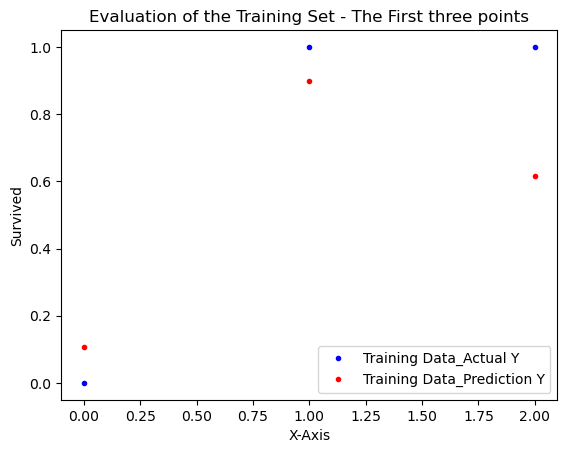

In [103]:
#Plotting just three values ("Actual Y values" vs "Predicted Y values" for the Training Set)

plt.plot(training_data_newX.index[0:3],training_data_targetY[0:3],"b.")
plt.plot(training_data_newX.index[0:3],PredictionY[0:3],"r.")
plt.xlabel("X-Axis")
plt.ylabel("Survived")
plt.title("Evaluation of the Training Set - The First three points")
plt.legend(["Training Data_Actual Y", "Training Data_Prediction Y"], loc ="lower right")
plt.show()

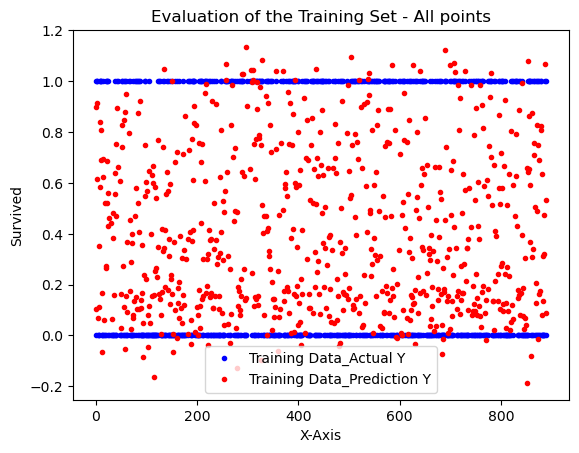

In [104]:
#Plotting just all values ("Actual Y values" vs "Predicted Y values" for the Training Set)

plt.plot(training_data_newX.index,training_data_targetY,"b.")
plt.plot(training_data_newX.index,PredictionY,"r.")
plt.xlabel("X-Axis")
plt.ylabel("Survived")
plt.title("Evaluation of the Training Set - All points")
plt.legend(["Training Data_Actual Y", "Training Data_Prediction Y"], loc ="lower center")
plt.show()

## __7. Cross Validation (K-Fold Cross Validation)__

This technique allow us:

1. Train the model in smaller "training subsets" and evaluate the model in a smaller "validation subset". In other words, the entire training set is split in smaller subsets. The aim of this method is assessing the model's behavior on unseen data. 

    1.1. To put it simply: Instead of getting only one Root Mean Square Error value (i.e. a measure of how far our predictions {from our model} is from the observed values) using the training set as we did in the section __6.4. Complete evaluation on the Training Dataset__).
    
    1.1. We can decide how many splits (i.e., "k-Folds" = "k-subsets") we want to do in the entire training set.

    1.2. The model is "trained" using "k-1" of the folds as training data. Then the model is "validated" on the remaining part of the data (i.e., the remaining "k-fold").

    1.3. The "cross validation's performance measure" is the average of the values computed in every "validation" step.
    
    1.4. This "cross validation" is repeated multiple times, each time using a different validation subset.

2. Avoid overfitting.

In [105]:
#Machine Learning - Evaluation of the Model (using only the training set) by Cross Validation (K-Fold Cross Validation)

#Getting the "score" by cross-validation. <-- Very Important!

#Some relevant arguments of the "cross_val_score" function are the followings:
    #cv:  (int). cross-validation generator or an iterable, default=None, to use the default 5-fold cross validation.
    
    #scoring: (str or callable), default=None
        #It is the model-evaluation tool when we use cross-validation.
        
        #Controls what "metric" it applies to the "estimator" evaluated.
            #metric = measure the distance between the model and the data. 
                #It could be any of the predefined functions for "classification, clustering or regression" models.
                #It follows the convention that higher return values are better than lower return values (i.e., opposite to the concept of the "Cost Function").
                #In this case we are interested to find the metric "mean_squared_error" (represented by the function "neg_mean_squared_error" which returns the "negated value of the metric").
                    #Therefore, I use the minus symbol ahead "np.sqrt(-scores_training)"
            #estimators = In this case I fit the data with "linear regression" (to be specific it is called "linear_reg")

#I choose "cv = 7" considering that my total training dataset (after some transformations) has 707 values. Consequently, every fold will have around 100 values using cv=7.

scores_training = cross_val_score(linear_reg,training_data_newX,training_data_targetY, scoring="neg_mean_squared_error",cv=7)
scores_training
linear_rmse_scores = np.sqrt(-scores_training)
linear_rmse_scores

array([0.39455001, 0.37417946, 0.38705167, 0.4244039 , 0.38116868,
       0.36377041, 0.36887443])

> Detailed information about how the argument "scoring" works inside the function "cross_val_score()"

<a href="https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter">Link about "Metrics and scoring: quantifying the quality of predictions"</a>


In [106]:
#Showing the "mean value" of the Root Mean Square's Score by Cross Validation (K-Fold Cross Validation)
linear_rmse_scores.mean()

0.38485693793583964

In [107]:
#Showing the "standard deviation" value of the Root Mean Square's Score by Cross Validation (K-Fold Cross Validation)
linear_rmse_scores.std()

0.01886201464625747

## __8. Fine-Tune the Model__

<span style="color:red">__IMPORTANT: THIS IS AN UNFINISHED NOTEBOOK__</span>

<span style="color:blue">__There is a lot of room for improvement!__</span>

Some ideas/topics to apply in this notebook: 

> Hyperparameters

> Synthetic data

> Custom Transformers

> Custom Functions

> Transformation Pipelines

> Stratified Test Set

> Data cleaning with scikit-learn

> Write efficient/faster code!


I am still working on the following items:

9. Tuning the model
10. Evaluate the Test Set

Reference: Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow (2nd Edition) by Aurélien Géron

<span style="color:indigo">__Comments/Feedback/Suggestions are welcome!__"</span>